In [1]:
%pdb
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Automatic pdb calling has been turned ON


In [2]:
#%run ./data.ipynb

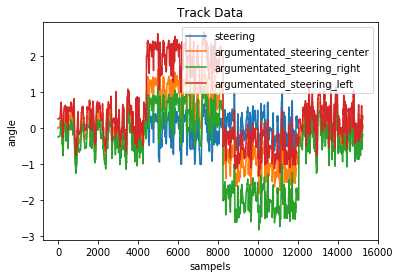

(15226, 11)


,index,center,left,right,steering,throttle,brake,speed,argumentated_steering_center,argumentated_steering_right,argumentated_steering_left
0,25,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.009434,0.000000,0.0,1.610105,0.009434,-0.240566,0.259434
1,26,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.009434,0.000000,0.0,1.597163,0.009434,-0.240566,0.259434
2,27,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.000000,0.0,1.581119,0.018868,-0.231132,0.268868
3,28,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.000000,0.0,1.568411,0.018868,-0.231132,0.268868
4,29,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.000000,0.0,1.555807,0.018868,-0.231132,0.268868
5,30,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.000000,0.0,1.543303,0.018868,-0.231132,0.268868
6,31,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.000000,0.0,1.530900,0.018868,-0.231132,0.268868
7,32,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.000000,0.0,1.518597,0.018868,-0.231132,0.268868
8,33,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.000000,0.0,1.506392,0.018868,-0.231132,0.268868
9,34,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.112449,0.0,1.551619,0.018868,-0.231132,0.268868


In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read csv
def get_csv(path,offset_argumented_steering_left = 0.25 ,offset_argumented_steering_center = 0,offset_argumented_steering_right = -0.25):
    # load CSV & drop zeros
    df = pd.read_csv(path+'driving_log.csv')
    df = df.drop(df[df['steering'] == 0.].index)
    df = df.drop(df[df['speed'] < 1.].index)
    df['center'] = path+df['center']
    df['right'] = path+df['right']
    df['left'] = path+df['left']
    df['argumentated_steering_center'] = df['steering'] + offset_argumented_steering_center
    df['argumentated_steering_right' ] = df['steering'] + offset_argumented_steering_right
    df['argumentated_steering_left'  ] = df['steering'] + offset_argumented_steering_left
    return df

tracks = [#get_csv(path = './track_data/andy_track1_offroad/'),\
          #get_csv(path = './track_data/andy_track1_offroad2/'),\
          #get_csv(path = './track_data/data/'),\
          #get_csv(path = './track_data/peters_drive/'),\
          #get_csv(path = './track_data/andy_track1_backward/'),\
          #get_csv(path = './track_data/andy_track1_forward/'),\
          #get_csv(path = './track_data/andy_track1_exact_drive/'),\
          #get_csv(path = './track_data/andy_track1_exact_drive2/'),\
          #get_csv(path = './track_data/andy_track1_exact_drive3/'),\
          #get_csv('./track_data/andy_track1_left/',2,.1,.5),\
          #get_csv('./track_data/andy_track1_right/',-.5,-.1,-2),\
    
          get_csv('./track_data/andy_track2_center_forward/'),\
          get_csv('./track_data/andy_track2_left_forward/',2,1,.5),\
          get_csv('./track_data/andy_track2_right_forward/',-.5,-1,-2),\
          get_csv('./track_data/andy_track2_center_backward/'),\
         ]
df = pd.concat(tracks).reset_index()

def plot_steering(df):
    ### plot 
    cols = ['steering','argumentated_steering_center','argumentated_steering_right','argumentated_steering_left']
    plt.plot(df[cols])
    plt.title('Track Data')
    plt.ylabel('angle')
    plt.xlabel('sampels')
    plt.legend(cols, loc='upper right')
    #plt.yscale('log')
    plt.show()
    
plot_steering(df)
print(df.shape)
df

In [4]:
def add_steering_classes_asym(df,n_classes):
    range_classes = sorted((df['steering']))[::int(len(df)/n_classes)][:]
    range_classes[0] = -np.inf
    range_classes[-1] = np.inf
    ##range_classes = (np.asarray(list(range(n_classes)))/n_classes*2 -1) 
    for j in (df.index):
        for i, range_class in enumerate(range_classes):
            if((df['steering'][j]) >= range_class):
                df.ix[j,'classes'] = i
                
    df['steering'].astype(int)
    return df , range_classes

def add_steering_classes(df,n_classes = 10):
    range_classes = sorted(np.abs(df['steering']))[::int(len(df)/n_classes)][1:]
    range_classes = np.append(np.asarray(list(range(n_classes)))[:] * range_classes[-2]/n_classes,1e6)
    for j in (df.index):
        for i, range_class in enumerate(range_classes):
            if(np.abs(df['steering'][j]) >= range_class):
                df.ix[j,'classes'] = i
                
    df['steering'].astype(int)
    return df , range_classes


def df_info(df,range_classes):
    plt.plot(sorted(np.abs(df['steering'])));
    plt.show()
    plt.plot(df['classes']);
    plt.show()
    print(range_classes)
    plt.plot(sorted(df['classes']));
    plt.show()

In [5]:
%time df, range_classes = add_steering_classes_asym(df,n_classes = 8)
#%time df, range_classes = add_steering_classes(df,n_classes = 6)
df

Wall time: 1min 12s


,index,center,left,right,steering,throttle,brake,speed,argumentated_steering_center,argumentated_steering_right,argumentated_steering_left,classes
0,25,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.009434,0.000000,0.0,1.610105,0.009434,-0.240566,0.259434,4.0
1,26,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.009434,0.000000,0.0,1.597163,0.009434,-0.240566,0.259434,4.0
2,27,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.000000,0.0,1.581119,0.018868,-0.231132,0.268868,4.0
3,28,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.000000,0.0,1.568411,0.018868,-0.231132,0.268868,4.0
4,29,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.000000,0.0,1.555807,0.018868,-0.231132,0.268868,4.0
5,30,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.000000,0.0,1.543303,0.018868,-0.231132,0.268868,4.0
6,31,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.000000,0.0,1.530900,0.018868,-0.231132,0.268868,4.0
7,32,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.000000,0.0,1.518597,0.018868,-0.231132,0.268868,4.0
8,33,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.000000,0.0,1.506392,0.018868,-0.231132,0.268868,4.0
9,34,./track_data/andy_track2_center_forward/IMG/ce...,./track_data/andy_track2_center_forward/IMG/le...,./track_data/andy_track2_center_forward/IMG/ri...,0.018868,0.112449,0.0,1.551619,0.018868,-0.231132,0.268868,4.0


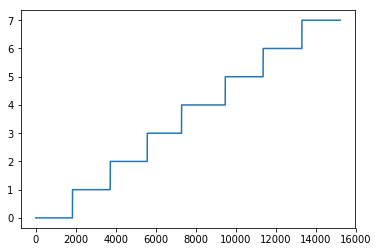

'[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

[-inf,
 -0.40566040000000003,
 -0.27358490000000002,
 -0.13207550000000001,
 0.0094339619999999989,
 0.1792453,
 0.28301890000000002,
 0.39622640000000003,
 inf]

In [6]:
plt.plot(sorted(df['classes'].values));
plt.show()
sorted(df['classes'].values).__repr__()
range_classes

In [7]:
# split data
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, test_size=1/21, random_state=42)

In [8]:
# argumentation and batching parameters:

image_shape = (160,320,3) #cv2.imread( df['center'][df['center'].index[0]]).shape
batch_size_single = 6
steering_argumentation_target_distance = 33

# generate argumentated batch
from sklearn.utils import shuffle
import traceback
import sys

def fill_batch(df,idxes):
    #try:
    batch_y            = np.empty(list([batch_size_single*6]))
    batch_x            = np.empty(list([batch_size_single*6]) + list(image_shape))
    idx_b = 0
    cnt = 0
    for idx in idxes:
        batch_y[0+idx_b]      = (df['argumentated_steering_center'].iloc[idx])
        batch_y[1+idx_b]      = (df['argumentated_steering_left'  ].iloc[idx])
        batch_y[2+idx_b]      = (df['argumentated_steering_right' ].iloc[idx])
        batch_y[3+idx_b]      = -batch_y[0+idx_b]
        batch_y[4+idx_b]      = -batch_y[1+idx_b]
        batch_y[5+idx_b]      = -batch_y[2+idx_b]
        batch_x[0+idx_b]      = cv2.imread(df['center'].iloc[idx].replace(" ", "").replace("\\", "/")) 
        batch_x[1+idx_b]      = cv2.imread(df['left'  ].iloc[idx].replace(" ", "").replace("\\", "/"))
        batch_x[2+idx_b]      = cv2.imread(df['right' ].iloc[idx].replace(" ", "").replace("\\", "/"))  
        batch_x[3+idx_b]      = batch_x[0+idx_b][:,-1::-1]
        batch_x[4+idx_b]      = batch_x[1+idx_b][:,-1::-1]
        batch_x[5+idx_b]      = batch_x[2+idx_b][:,-1::-1]
        idx_b += 6
    
    assert(not(np.isnan((np.sum(batch_x))))), 'is nan'
    assert(not(np.isnan((np.sum(batch_y))))), 'is nan'
    cnt +=1
    #print('len(batch_x)',len(batch_x))
    return shuffle(batch_x,batch_y)
    #yield shuffle(batch_x,batch_y) 
    #except:
    #    print("\r\n\r\nUnexpected error: {} \r\n\r\n".format(sys.exc_info()[0]))
    #    raise

def get_batch(df,batch_size_single): 
    n_split = int(len(df)//batch_size_single)-1
    batch_idx = (df[:batch_size_single*n_split].index.values)   
    batch_idx = shuffle(batch_idx)
    batch_idx = batch_idx.reshape(n_split,batch_size_single,)
    while 1:
        #print('\r\nget_batch: start ',flush=True)
        cnt = 0
        for idxes in batch_idx:
            try:
                yield (fill_batch(df,idxes))
            except:
                print("\r\n\r\nUnexpected error: {} \r\n\r\n".format(sys.exc_info()[0]))
                raise

def get_stratified_batch(df,batch_size_single):
    
    from sklearn.model_selection import StratifiedShuffleSplit
    random_state=42
    
    while 1:
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=random_state)
        train_index, test_index = next(sss.split(df.index.values.copy(), df['classes']))
        
        n_split = int(len(train_index)//batch_size_single)-1
        batch_idx = (train_index[:batch_size_single*n_split])   
        batch_idx = shuffle(batch_idx)
        batch_idx = batch_idx.reshape(n_split,batch_size_single,)
    
        cnt = 0
        for idxes in batch_idx:
            #try:
            batch_x,batch_y, = (fill_batch(df,idxes))
            yield batch_x,batch_y
            #except:
            #    print("\r\n\r\nUnexpected error: {} \r\n\r\n".format(sys.exc_info()[0]))
            #    raise

#train_generator = get_batch(df_train, batch_size_single=batch_size_single)
#validation_generator = get_batch(df_val, batch_size_single=batch_size_single)

train_generator = get_stratified_batch(df_train, batch_size_single=batch_size_single)
validation_generator = get_stratified_batch(df_val, batch_size_single=batch_size_single)


(36, 160, 320, 3)


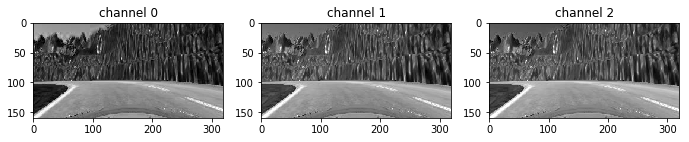

steering: 0.5849057, idx: 0


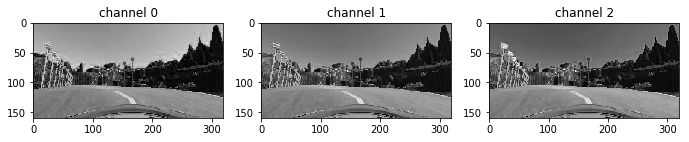

steering: -0.245283, idx: 6


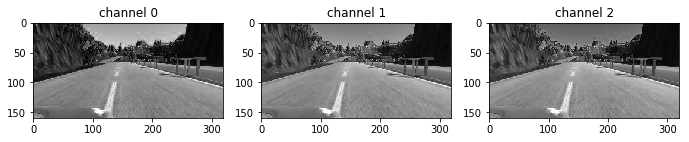

steering: -0.29716982000000003, idx: 12


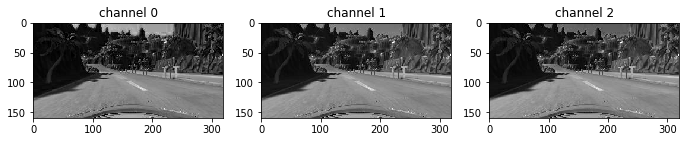

steering: -0.22641509999999998, idx: 18


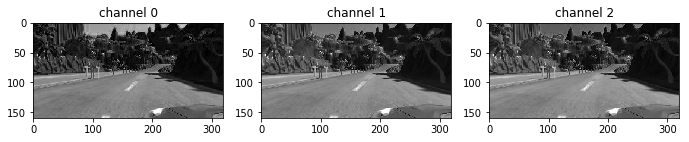

steering: 0.4764151, idx: 24


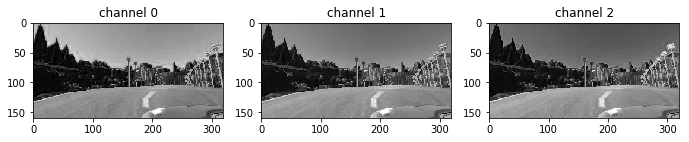

steering: 0.49528300000000003, idx: 30
Wall time: 7.67 s


In [ ]:
import matplotlib

def plot_history_object(history_object):
    ### print the keys contained in the history object
    print(history_object.history.keys())

    ### plot the training and validation loss for each epoch
    plt.plot(history_object.history['loss'])
    plt.plot(history_object.history['val_loss'])
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.yscale('log')
    plt.show()

def visualise_dataset(image,label,steps):
    plt_num = 1
    print(image.shape)
    step_size = int(image.shape[0]/steps)
    for image_idx in range(0,image.shape[0],step_size):
        channels = image.shape[3]
        plt.figure(plt_num, figsize=(32,32))
        for channel in range(channels):
            plt.subplot(4,8, channel+1) # sets the number of feature maps to show on each row and column
            plt.title('channel ' + str(channel)) # displays the feature map number
            plt.imshow(image[image_idx,:,:,channel], interpolation="nearest",cmap="gray") # cmap="gist_earth_r"
        plt.show()
        print('steering: {1}, idx: {0}'.format(image_idx,label[image_idx],))

batch_x,batch_y = next(train_generator)
%time visualise_dataset(batch_x,batch_y,steps=6 )#* batch_size_single)


Using TensorFlow backend.


nb_epoch   	:  2416
batch_size 	:    36
patience   	:  5000
model init done
load_weights done
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_1 (Cropping2D)        (None, 72, 320, 3)    0           cropping2d_input_1[0][0]         
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 72, 320, 3)    0           cropping2d_1[0][0]               
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 36, 160, 16)   3904        lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 18, 80, 32)    25120       convolution2d_1[0][0]          

216/216 [==============================] - 30s - loss: 0.3426 - val_loss: 0.0459
Epoch 45/2416
216/216 [==============================] - 29s - loss: 0.5132 - val_loss: 0.4506
Epoch 46/2416
216/216 [==============================] - 30s - loss: 0.4473 - val_loss: 0.6451
Epoch 47/2416
216/216 [==============================] - 29s - loss: 0.3240 - val_loss: 0.7671
Epoch 48/2416
216/216 [==============================] - 25s - loss: 0.3606 - val_loss: 0.0482
Epoch 49/2416
216/216 [==============================] - 26s - loss: 0.3615 - val_loss: 0.5852
Epoch 50/2416
216/216 [==============================] - 27s - loss: 0.4513 - val_loss: 0.6786
Epoch 51/2416
216/216 [==============================] - 28s - loss: 0.2702 - val_loss: 0.3856
Epoch 52/2416
216/216 [==============================] - 29s - loss: 0.5304 - val_loss: 0.0986
Epoch 53/2416
216/216 [==============================] - 28s - loss: 0.4288 - val_loss: 0.2469
Epoch 54/2416
216/216 [==============================] - 28s - l

216/216 [==============================] - 23s - loss: 0.3289 - val_loss: 0.1198
Epoch 131/2416
216/216 [==============================] - 23s - loss: 0.3461 - val_loss: 0.1780
Epoch 132/2416
216/216 [==============================] - 23s - loss: 0.5274 - val_loss: 0.3764
Epoch 133/2416
216/216 [==============================] - 23s - loss: 0.4326 - val_loss: 0.0638
Epoch 134/2416
216/216 [==============================] - 23s - loss: 0.2406 - val_loss: 0.2440
Epoch 135/2416
216/216 [==============================] - 23s - loss: 0.2675 - val_loss: 0.2583
Epoch 136/2416
216/216 [==============================] - 23s - loss: 0.5930 - val_loss: 0.2205
Epoch 137/2416
216/216 [==============================] - 23s - loss: 0.3622 - val_loss: 0.0710
Epoch 138/2416
216/216 [==============================] - 23s - loss: 0.4264 - val_loss: 0.2348
Epoch 139/2416
216/216 [==============================] - 23s - loss: 0.2765 - val_loss: 0.0837
Epoch 140/2416
216/216 [==============================]

216/216 [==============================] - 23s - loss: 0.4475 - val_loss: 0.3275
Epoch 216/2416
216/216 [==============================] - 23s - loss: 0.4811 - val_loss: 0.2433
Epoch 217/2416
216/216 [==============================] - 23s - loss: 0.3471 - val_loss: 0.3245
Epoch 218/2416
216/216 [==============================] - 22s - loss: 0.2595 - val_loss: 0.2150
Epoch 219/2416
216/216 [==============================] - 23s - loss: 0.4659 - val_loss: 0.1473
Epoch 220/2416
216/216 [==============================] - 22s - loss: 0.3545 - val_loss: 0.0593
Epoch 221/2416
216/216 [==============================] - 23s - loss: 0.2540 - val_loss: 0.3264
Epoch 222/2416
216/216 [==============================] - 23s - loss: 0.3379 - val_loss: 0.2257
Epoch 223/2416
216/216 [==============================] - 23s - loss: 0.3597 - val_loss: 0.6546
Epoch 224/2416
216/216 [==============================] - 23s - loss: 0.2768 - val_loss: 0.1663
Epoch 225/2416
216/216 [==============================]

216/216 [==============================] - 24s - loss: 0.3316 - val_loss: 0.3157
Epoch 301/2416
216/216 [==============================] - 23s - loss: 0.2564 - val_loss: 0.3795
Epoch 302/2416
216/216 [==============================] - 23s - loss: 0.4272 - val_loss: 0.0703
Epoch 303/2416
216/216 [==============================] - 22s - loss: 0.2400 - val_loss: 0.1142
Epoch 304/2416
216/216 [==============================] - 23s - loss: 0.2847 - val_loss: 0.0955
Epoch 305/2416
216/216 [==============================] - 24s - loss: 0.3051 - val_loss: 0.1790
Epoch 306/2416
216/216 [==============================] - 23s - loss: 0.2550 - val_loss: 0.3731
Epoch 307/2416
216/216 [==============================] - 23s - loss: 0.3079 - val_loss: 0.1800
Epoch 308/2416
216/216 [==============================] - 22s - loss: 0.2932 - val_loss: 0.0799
Epoch 309/2416
216/216 [==============================] - 22s - loss: 0.2290 - val_loss: 0.1434
Epoch 310/2416
216/216 [==============================]

216/216 [==============================] - 23s - loss: 0.3126 - val_loss: 0.5971
Epoch 386/2416
216/216 [==============================] - 23s - loss: 0.4087 - val_loss: 0.4558
Epoch 387/2416
216/216 [==============================] - 22s - loss: 0.2885 - val_loss: 0.2140
Epoch 388/2416
216/216 [==============================] - 23s - loss: 0.3409 - val_loss: 0.1899
Epoch 389/2416
216/216 [==============================] - 24s - loss: 0.3390 - val_loss: 0.2809
Epoch 390/2416
216/216 [==============================] - 22s - loss: 0.4019 - val_loss: 0.3652
Epoch 391/2416
216/216 [==============================] - 23s - loss: 0.2831 - val_loss: 0.5446
Epoch 392/2416
216/216 [==============================] - 23s - loss: 0.4264 - val_loss: 0.4345
Epoch 393/2416
216/216 [==============================] - 23s - loss: 0.2285 - val_loss: 0.2629
Epoch 394/2416
216/216 [==============================] - 25s - loss: 0.2576 - val_loss: 0.2328
Epoch 395/2416
216/216 [==============================]

216/216 [==============================] - 23s - loss: 0.3874 - val_loss: 0.1538
Epoch 471/2416
216/216 [==============================] - 23s - loss: 0.2211 - val_loss: 0.0673
Epoch 472/2416
216/216 [==============================] - 23s - loss: 0.3204 - val_loss: 0.0286
Epoch 473/2416
216/216 [==============================] - 24s - loss: 0.1979 - val_loss: 0.5012
Epoch 474/2416
216/216 [==============================] - 22s - loss: 0.2940 - val_loss: 0.0395
Epoch 475/2416
216/216 [==============================] - 22s - loss: 0.2589 - val_loss: 0.2116
Epoch 476/2416
216/216 [==============================] - 23s - loss: 0.4688 - val_loss: 0.1264
Epoch 477/2416
216/216 [==============================] - 23s - loss: 0.3900 - val_loss: 0.0961
Epoch 478/2416
216/216 [==============================] - 23s - loss: 0.3671 - val_loss: 0.0445
Epoch 479/2416
216/216 [==============================] - 22s - loss: 0.2178 - val_loss: 0.2195
Epoch 480/2416
216/216 [==============================]

216/216 [==============================] - 23s - loss: 0.3585 - val_loss: 0.4519
Epoch 556/2416
216/216 [==============================] - 23s - loss: 0.2139 - val_loss: 0.1523
Epoch 557/2416
216/216 [==============================] - 22s - loss: 0.3373 - val_loss: 0.1015
Epoch 558/2416
216/216 [==============================] - 22s - loss: 0.2714 - val_loss: 0.3225
Epoch 559/2416
216/216 [==============================] - 22s - loss: 0.2643 - val_loss: 0.2027
Epoch 560/2416
216/216 [==============================] - 22s - loss: 0.3591 - val_loss: 0.2119
Epoch 561/2416
216/216 [==============================] - 22s - loss: 0.2211 - val_loss: 0.2824
Epoch 562/2416
216/216 [==============================] - 23s - loss: 0.3407 - val_loss: 0.4913
Epoch 563/2416
216/216 [==============================] - 23s - loss: 0.3250 - val_loss: 0.2565
Epoch 564/2416
216/216 [==============================] - 22s - loss: 0.2629 - val_loss: 0.2142
Epoch 565/2416
216/216 [==============================]

216/216 [==============================] - 23s - loss: 0.2901 - val_loss: 0.2261
Epoch 641/2416
216/216 [==============================] - 22s - loss: 0.1362 - val_loss: 0.1152
Epoch 642/2416
216/216 [==============================] - 22s - loss: 0.2804 - val_loss: 0.4412
Epoch 643/2416
216/216 [==============================] - 22s - loss: 0.4386 - val_loss: 0.5852
Epoch 644/2416
216/216 [==============================] - 23s - loss: 0.3861 - val_loss: 0.0503
Epoch 645/2416
216/216 [==============================] - 22s - loss: 0.2739 - val_loss: 0.1883
Epoch 646/2416
216/216 [==============================] - 22s - loss: 0.3456 - val_loss: 0.0765
Epoch 647/2416
216/216 [==============================] - 23s - loss: 0.3182 - val_loss: 0.2178
Epoch 648/2416
216/216 [==============================] - 23s - loss: 0.2823 - val_loss: 0.1940
Epoch 649/2416
216/216 [==============================] - 23s - loss: 0.2837 - val_loss: 0.4023
Epoch 650/2416
216/216 [==============================]

216/216 [==============================] - 22s - loss: 0.2735 - val_loss: 0.7402
Epoch 726/2416
216/216 [==============================] - 23s - loss: 0.4161 - val_loss: 0.1449
Epoch 727/2416
216/216 [==============================] - 23s - loss: 0.2416 - val_loss: 0.1270
Epoch 728/2416
216/216 [==============================] - 23s - loss: 0.2392 - val_loss: 0.3181
Epoch 729/2416
216/216 [==============================] - 22s - loss: 0.3714 - val_loss: 0.0378
Epoch 730/2416
216/216 [==============================] - 23s - loss: 0.3187 - val_loss: 0.1979
Epoch 731/2416
216/216 [==============================] - 22s - loss: 0.3373 - val_loss: 0.1318
Epoch 732/2416
216/216 [==============================] - 23s - loss: 0.3536 - val_loss: 0.0796
Epoch 733/2416
216/216 [==============================] - 23s - loss: 0.2531 - val_loss: 0.1541
Epoch 734/2416
216/216 [==============================] - 23s - loss: 0.3015 - val_loss: 0.3945
Epoch 735/2416
216/216 [==============================]

216/216 [==============================] - 23s - loss: 0.1776 - val_loss: 0.1008
Epoch 811/2416
216/216 [==============================] - 22s - loss: 0.3725 - val_loss: 0.3517
Epoch 812/2416
216/216 [==============================] - 22s - loss: 0.1607 - val_loss: 0.2227
Epoch 813/2416
216/216 [==============================] - 23s - loss: 0.2185 - val_loss: 0.6644
Epoch 814/2416
216/216 [==============================] - 23s - loss: 0.1941 - val_loss: 0.3962
Epoch 815/2416
216/216 [==============================] - 23s - loss: 0.1927 - val_loss: 0.4000
Epoch 816/2416
216/216 [==============================] - 23s - loss: 0.3244 - val_loss: 0.0817
Epoch 817/2416
216/216 [==============================] - 23s - loss: 0.2931 - val_loss: 0.5893
Epoch 818/2416
216/216 [==============================] - 23s - loss: 0.2996 - val_loss: 0.2666
Epoch 819/2416
216/216 [==============================] - 22s - loss: 0.2840 - val_loss: 0.2459
Epoch 820/2416
216/216 [==============================]

216/216 [==============================] - 22s - loss: 0.2386 - val_loss: 0.1578
Epoch 896/2416
216/216 [==============================] - 23s - loss: 0.2260 - val_loss: 0.1469
Epoch 897/2416
216/216 [==============================] - 23s - loss: 0.5033 - val_loss: 0.1769
Epoch 898/2416
216/216 [==============================] - 23s - loss: 0.2602 - val_loss: 0.5670
Epoch 899/2416
216/216 [==============================] - 22s - loss: 0.2928 - val_loss: 0.2225
Epoch 900/2416
216/216 [==============================] - 24s - loss: 0.3934 - val_loss: 0.1053
Epoch 901/2416
216/216 [==============================] - 23s - loss: 0.4099 - val_loss: 0.4045
Epoch 902/2416
216/216 [==============================] - 23s - loss: 0.2119 - val_loss: 0.4363
Epoch 903/2416
216/216 [==============================] - 23s - loss: 0.2695 - val_loss: 0.1244
Epoch 904/2416
216/216 [==============================] - 23s - loss: 0.3792 - val_loss: 0.0596
Epoch 905/2416
216/216 [==============================]

216/216 [==============================] - 24s - loss: 0.3699 - val_loss: 0.1254
Epoch 981/2416
216/216 [==============================] - 24s - loss: 0.1711 - val_loss: 0.0385
Epoch 982/2416
216/216 [==============================] - 24s - loss: 0.4307 - val_loss: 0.5337
Epoch 983/2416
216/216 [==============================] - 24s - loss: 0.2322 - val_loss: 0.0950
Epoch 984/2416
216/216 [==============================] - 24s - loss: 0.2566 - val_loss: 0.0806
Epoch 985/2416
216/216 [==============================] - 23s - loss: 0.2799 - val_loss: 0.2996
Epoch 986/2416
216/216 [==============================] - 24s - loss: 0.4105 - val_loss: 0.2195
Epoch 987/2416
216/216 [==============================] - 23s - loss: 0.3250 - val_loss: 0.1456
Epoch 988/2416
216/216 [==============================] - 23s - loss: 0.2884 - val_loss: 0.1405
Epoch 989/2416
216/216 [==============================] - 24s - loss: 0.2678 - val_loss: 0.0988
Epoch 990/2416
216/216 [==============================]

216/216 [==============================] - 23s - loss: 0.3881 - val_loss: 0.3267
Epoch 1065/2416
216/216 [==============================] - 22s - loss: 0.3124 - val_loss: 0.1882
Epoch 1066/2416
216/216 [==============================] - 22s - loss: 0.4352 - val_loss: 0.0672
Epoch 1067/2416
216/216 [==============================] - 23s - loss: 0.2799 - val_loss: 0.2412
Epoch 1068/2416
216/216 [==============================] - 22s - loss: 0.2990 - val_loss: 0.1839
Epoch 1069/2416
216/216 [==============================] - 23s - loss: 0.2961 - val_loss: 0.4461
Epoch 1070/2416
216/216 [==============================] - 23s - loss: 0.2463 - val_loss: 0.2177
Epoch 1071/2416
216/216 [==============================] - 23s - loss: 0.2515 - val_loss: 0.0692
Epoch 1072/2416
216/216 [==============================] - 23s - loss: 0.3970 - val_loss: 0.1285
Epoch 1073/2416
216/216 [==============================] - 24s - loss: 0.2301 - val_loss: 0.2911
Epoch 1074/2416
216/216 [=====================

216/216 [==============================] - 22s - loss: 0.3219 - val_loss: 0.4087
Epoch 1149/2416
216/216 [==============================] - 23s - loss: 0.3273 - val_loss: 0.4183
Epoch 1150/2416
216/216 [==============================] - 23s - loss: 0.3312 - val_loss: 0.6380
Epoch 1151/2416
216/216 [==============================] - 24s - loss: 0.1808 - val_loss: 0.2885
Epoch 1152/2416
216/216 [==============================] - 22s - loss: 0.2741 - val_loss: 0.2283
Epoch 1153/2416
216/216 [==============================] - 23s - loss: 0.3172 - val_loss: 0.0779
Epoch 1154/2416
216/216 [==============================] - 22s - loss: 0.3284 - val_loss: 0.1261
Epoch 1155/2416
216/216 [==============================] - 23s - loss: 0.2552 - val_loss: 0.1290
Epoch 1156/2416
216/216 [==============================] - 22s - loss: 0.3761 - val_loss: 0.1771
Epoch 1157/2416
216/216 [==============================] - 22s - loss: 0.2292 - val_loss: 0.0440
Epoch 1158/2416
216/216 [=====================

216/216 [==============================] - 23s - loss: 0.3321 - val_loss: 0.0478
Epoch 1233/2416
216/216 [==============================] - 22s - loss: 0.2197 - val_loss: 0.6128
Epoch 1234/2416
216/216 [==============================] - 23s - loss: 0.3437 - val_loss: 0.0843
Epoch 1235/2416
216/216 [==============================] - 22s - loss: 0.3672 - val_loss: 0.2544
Epoch 1236/2416
216/216 [==============================] - 23s - loss: 0.1932 - val_loss: 0.0493
Epoch 1237/2416
216/216 [==============================] - 22s - loss: 0.2810 - val_loss: 0.1840
Epoch 1238/2416
216/216 [==============================] - 23s - loss: 0.1592 - val_loss: 0.1866
Epoch 1239/2416
216/216 [==============================] - 22s - loss: 0.1973 - val_loss: 0.1680
Epoch 1240/2416
216/216 [==============================] - 22s - loss: 0.4171 - val_loss: 0.1677
Epoch 1241/2416
216/216 [==============================] - 23s - loss: 0.2310 - val_loss: 0.5811
Epoch 1242/2416
216/216 [=====================

216/216 [==============================] - 23s - loss: 0.3018 - val_loss: 0.4835
Epoch 1317/2416
216/216 [==============================] - 23s - loss: 0.2295 - val_loss: 0.2022
Epoch 1318/2416
216/216 [==============================] - 22s - loss: 0.2159 - val_loss: 0.1034
Epoch 1319/2416
216/216 [==============================] - 23s - loss: 0.3433 - val_loss: 0.2926
Epoch 1320/2416
216/216 [==============================] - 23s - loss: 0.3614 - val_loss: 0.4536
Epoch 1321/2416
216/216 [==============================] - 27s - loss: 0.1304 - val_loss: 0.3392
Epoch 1322/2416
216/216 [==============================] - 23s - loss: 0.2768 - val_loss: 0.2268
Epoch 1323/2416
216/216 [==============================] - 22s - loss: 0.4122 - val_loss: 0.2489
Epoch 1324/2416
216/216 [==============================] - 22s - loss: 0.4144 - val_loss: 0.5448
Epoch 1325/2416
216/216 [==============================] - 23s - loss: 0.3698 - val_loss: 0.1988
Epoch 1326/2416
216/216 [=====================

216/216 [==============================] - 23s - loss: 0.2377 - val_loss: 0.1244
Epoch 1401/2416
216/216 [==============================] - 22s - loss: 0.2527 - val_loss: 0.4787
Epoch 1402/2416
216/216 [==============================] - 23s - loss: 0.1321 - val_loss: 0.1624
Epoch 1403/2416
216/216 [==============================] - 23s - loss: 0.3911 - val_loss: 0.8351
Epoch 1404/2416
216/216 [==============================] - 22s - loss: 0.1510 - val_loss: 0.3556
Epoch 1405/2416
216/216 [==============================] - 25s - loss: 0.2938 - val_loss: 0.3395
Epoch 1406/2416
216/216 [==============================] - 23s - loss: 0.3691 - val_loss: 0.1368
Epoch 1407/2416
216/216 [==============================] - 22s - loss: 0.2243 - val_loss: 0.0736
Epoch 1408/2416
216/216 [==============================] - 23s - loss: 0.4278 - val_loss: 0.0428
Epoch 1409/2416
216/216 [==============================] - 22s - loss: 0.3122 - val_loss: 0.3193
Epoch 1410/2416
216/216 [=====================

216/216 [==============================] - 25s - loss: 0.1384 - val_loss: 0.1111
Epoch 1485/2416
216/216 [==============================] - 23s - loss: 0.2857 - val_loss: 0.0747
Epoch 1486/2416
216/216 [==============================] - 22s - loss: 0.3177 - val_loss: 0.1477
Epoch 1487/2416
216/216 [==============================] - 22s - loss: 0.2399 - val_loss: 0.0403
Epoch 1488/2416
216/216 [==============================] - 22s - loss: 0.2642 - val_loss: 0.0864
Epoch 1489/2416
216/216 [==============================] - 22s - loss: 0.2719 - val_loss: 0.4682
Epoch 1490/2416
216/216 [==============================] - 22s - loss: 0.3056 - val_loss: 0.2394
Epoch 1491/2416
216/216 [==============================] - 23s - loss: 0.2369 - val_loss: 0.2305
Epoch 1492/2416
216/216 [==============================] - 22s - loss: 0.1235 - val_loss: 0.2549
Epoch 1493/2416
216/216 [==============================] - 23s - loss: 0.2362 - val_loss: 0.1370
Epoch 1494/2416
216/216 [=====================

216/216 [==============================] - 22s - loss: 0.2802 - val_loss: 0.0506
Epoch 1569/2416
216/216 [==============================] - 22s - loss: 0.5261 - val_loss: 0.3660
Epoch 1570/2416
216/216 [==============================] - 22s - loss: 0.2917 - val_loss: 0.1006
Epoch 1571/2416
216/216 [==============================] - 22s - loss: 0.3628 - val_loss: 0.4657
Epoch 1572/2416
216/216 [==============================] - 22s - loss: 0.2703 - val_loss: 0.0382
Epoch 1573/2416
216/216 [==============================] - 23s - loss: 0.2507 - val_loss: 0.1584
Epoch 1574/2416
216/216 [==============================] - 23s - loss: 0.2901 - val_loss: 0.1400
Epoch 1575/2416
216/216 [==============================] - 23s - loss: 0.3298 - val_loss: 0.0487
Epoch 1576/2416
216/216 [==============================] - 22s - loss: 0.2867 - val_loss: 0.2068
Epoch 1577/2416
216/216 [==============================] - 22s - loss: 0.5825 - val_loss: 0.0900
Epoch 1578/2416
216/216 [=====================

216/216 [==============================] - 23s - loss: 0.4518 - val_loss: 0.0652
Epoch 1653/2416
216/216 [==============================] - 22s - loss: 0.3662 - val_loss: 0.0546
Epoch 1654/2416
216/216 [==============================] - 22s - loss: 0.1497 - val_loss: 0.4714
Epoch 1655/2416
216/216 [==============================] - 22s - loss: 0.3588 - val_loss: 0.3568
Epoch 1656/2416
216/216 [==============================] - 22s - loss: 0.3392 - val_loss: 0.3405
Epoch 1657/2416
216/216 [==============================] - 22s - loss: 0.1813 - val_loss: 0.2493
Epoch 1658/2416
216/216 [==============================] - 23s - loss: 0.2818 - val_loss: 0.3283
Epoch 1659/2416
216/216 [==============================] - 22s - loss: 0.2033 - val_loss: 0.1584
Epoch 1660/2416
216/216 [==============================] - 22s - loss: 0.2692 - val_loss: 0.3343
Epoch 1661/2416
216/216 [==============================] - 22s - loss: 0.2695 - val_loss: 0.0643
Epoch 1662/2416
216/216 [=====================

216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1740/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1741/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1742/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1743/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1744/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1745/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1746/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 1747/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 1748/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1749/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 1750/2416

216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 1830/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 1831/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1832/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1833/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 1834/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 1835/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 1836/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1837/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 1838/2416
216/216 [==============================] - 25s - loss: nan - val_loss: nan
Epoch 1839/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 1840/2416

216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 1920/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 1921/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1922/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1923/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1924/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 1925/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1926/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1927/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1928/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1929/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 1930/2416

216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2010/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2011/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2012/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2013/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2014/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2015/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2016/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2017/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 2018/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2019/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2020/2416

216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 2100/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2101/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2102/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 2103/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 2104/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2105/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2106/2416
216/216 [==============================] - 24s - loss: nan - val_loss: nan
Epoch 2107/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2108/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 2109/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2110/2416

216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2190/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2191/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 2192/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2193/2416
216/216 [==============================] - 25s - loss: nan - val_loss: nan
Epoch 2194/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2195/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 2196/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 2197/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2198/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 2199/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2200/2416

216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2280/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2281/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2282/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2283/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2284/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2285/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2286/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2287/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2288/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2289/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2290/2416

216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2370/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2371/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2372/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2373/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2374/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2375/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2376/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2377/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 2378/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2379/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 2380/2416

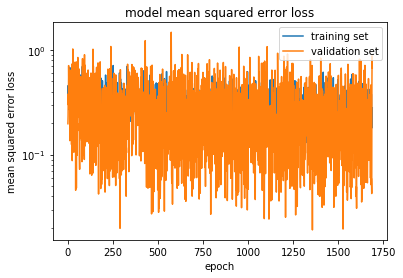

Epoch 1/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 2/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 3/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 4/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 5/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 6/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 7/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 8/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 9/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 10/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 11/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 12/2416
216/216 [=======

216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 94/2416
216/216 [==============================] - 25s - loss: nan - val_loss: nan
Epoch 95/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 96/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 97/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 98/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 99/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 100/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 101/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 102/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 103/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 104/2416
216/216 [=======

216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 185/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 186/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 187/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 188/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 189/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 190/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 191/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 192/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 193/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 194/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 195/2416
216/216 [=

216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 276/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 277/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 278/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 279/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 280/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 281/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 282/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 283/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 284/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 285/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 286/2416
216/216 [=

216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 367/2416
216/216 [==============================] - 25s - loss: nan - val_loss: nan
Epoch 368/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 369/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 370/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 371/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 372/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 373/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 374/2416
216/216 [==============================] - 23s - loss: nan - val_loss: nan
Epoch 375/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 376/2416
216/216 [==============================] - 22s - loss: nan - val_loss: nan
Epoch 377/2416
216/216 [=

In [ ]:
from keras.models import Sequential,load_model
from keras.layers.core import Dense, Activation, Dropout, Reshape, Flatten, Lambda
from keras.layers.convolutional import Convolution2D, Cropping2D, SeparableConv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Merge
from keras.callbacks import EarlyStopping, ModelCheckpoint, LambdaCallback, RemoteMonitor

import tensorflow as tf

# Hyperparameter Compile
loss= 'mse' # 'hinge'
optimizer= 'Nadam' #'Nadam' #'rmsprop'

# Hyperparameter Fit
rounds = 1
n_batches = len(df_train)//batch_size_single

nb_epoch= n_batches * rounds
batch_size = batch_size_single * 6
patience=5000

print('nb_epoch   \t: {:>5}'.format(nb_epoch))
print('batch_size \t: {:>5}'.format(batch_size))
print('patience   \t: {:>5}'.format(patience))

def model_a():
    model = Sequential()
    model.add(Cropping2D(cropping=((65,23), (0,0)), input_shape=image_shape)) #23
    #model.add(Lambda(lambda x: (x[:,:,:,0:1]+x[:,:,:,1:2]+x[:,:,:,2:3])/3)) ## drive on gray
    model.add(Lambda(lambda x: x/127.5 - 1.))
    output_shape = ((model.layers[-1].output_shape))
    #model.add(Reshape((output_shape[1]*2,int(output_shape[2]/2),output_shape[3],)))
    a = 4
    model.add(Convolution2D(2**(a+0), 9, 9, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+1), 7, 7, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+2), 5, 5, subsample=(1, 1), border_mode="same", activation = 'elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(2**(a+3), 3, 3, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+4), 3, 3, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+5), 3, 3, subsample=(1, 1), border_mode="same", activation = 'elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())  
    model.add(Flatten())
    model.add(Dropout(.66))
    model.add(Dense(4**4, activation = 'sigmoid'))
    model.add(Dense(3**3, activation = 'linear'))
    model.add(Dense(2**2, activation = 'linear'))
    model.add(Dense(1**1, activation = 'linear'))
    return model


try:
    #model = load_model('model.h5')
    model = model_a()
    print("model init done")
    model.load_weights("model.h5")
    print("load_weights done")
except:
    print("load_weights failed")
    model = model_a()
  
model.summary()

%time model.compile(loss=loss, optimizer=optimizer)

losses = []
def save_loss(epoch, logs):
    #print(epoch)
    try:
        #print(logs)
        losses.append(logs['loss'])
        #plt.plot(losses)
        #plt.title('loss history')
        #plt.ylabel('loss')
        #plt.xlabel('batch')
        #plt.yscale('log')
        #plt.show()
    except:
        pass

def callbacks():
    remote = RemoteMonitor()
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience,verbose=1,)
    model_checkpoit = ModelCheckpoint('model.h5', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
    save_loss_callback = LambdaCallback(on_batch_end=save_loss)
    #return [remote, early_stopping,model_checkpoit,save_loss_callback]
    return [model_checkpoit]

history_objects = []
while(1):
    history_object = model.fit_generator(generator         = train_generator, \
                        samples_per_epoch = batch_size*6, \
                        validation_data   = validation_generator, \
                        nb_val_samples    = 1, \
                        nb_epoch          = nb_epoch,\
                        callbacks         = callbacks() \
                                        )
    try:
        history_objects += history_object
    except:
        pass
    
    plot_history_object(history_object)

#import winsound
#winsound.Beep(130,10000)

In [ ]:
def plot_loss():
    plt.plot(losses)
    plt.title('loss history')
    plt.ylabel('loss')
    plt.xlabel('batch')
    plt.yscale('log')
    plt.show()

plot_loss()

In [ ]:
batch_x,batch_y = next(train_generator)
%time visualise_dataset(batch_x,batch_y,steps=60)

In [ ]:
import argparse
import base64
from datetime import datetime
import os
import shutil

import numpy as np
import socketio
import eventlet
import eventlet.wsgi
from PIL import Image
from flask import Flask
from io import BytesIO

from keras.models import load_model
import h5py
from keras import __version__ as keras_version

#model = load_model('model.h5')
#print("load_model done")

sio = socketio.Server()
app = Flask(__name__)
prev_image_array = None


class SimplePIController:
    def __init__(self, Kp, Ki):
        self.Kp = Kp
        self.Ki = Ki
        self.set_point = 0.
        self.error = 0.
        self.integral = 0.

    def set_desired(self, desired):
        self.set_point = desired

    def update(self, measurement):
        # proportional error
        self.error = self.set_point - measurement
        # integral error
        self.integral += self.error
        return self.Kp * self.error + self.Ki * self.integral

controller = SimplePIController(0.1, 0.002)
set_speed = 5
controller.set_desired(set_speed)

@sio.on('telemetry')
def telemetry(sid, data):
    if data:
        # The current steering angle of the car
        steering_angle = data["steering_angle"]
        # The current throttle of the car
        throttle = data["throttle"]
        # The current speed of the car
        speed = data["speed"]
        # The current image from the center camera of the car
        imgString = data["image"]
        image = Image.open(BytesIO(base64.b64decode(imgString)))
        image_array = np.asarray(image)
        steering_angle = float(model.predict(image_array[None, :, :, :], batch_size=1))
        throttle = controller.update(float(speed))
        print(steering_angle, throttle)
        send_control(steering_angle, throttle)
    else:
        # NOTE: DON'T EDIT THIS.
        sio.emit('manual', data={}, skip_sid=True)


@sio.on('connect')
def connect(sid, environ):
    print("connect ", sid)
    send_control(0, 0)

def send_control(steering_angle, throttle):
    sio.emit(
        "steer",
        data={
            'steering_angle': steering_angle.__str__(),
            'throttle': throttle.__str__()
        },
        skip_sid=True)

# wrap Flask application with engineio's middleware
app = socketio.Middleware(sio, app)

# deploy as an eventlet WSGI server
eventlet.wsgi.server(eventlet.listen(('', 4567)), app)



In [ ]:
#Todos:

'''
def get_StratifiedShuffleSplit(batches_idx,batch_size):
    n_bins  = 5
    batch_size = 5*7*7
    y_classes = df['steering'].copy()*n_bins//1
    batches_idx = df.index
    data_size = len(batches_idx)
    n_split = int(data_size//batch_size)-1
    print(n_split)
    batch_range = df.index
    sss = StratifiedShuffleSplit(n_splits = n_split,test_size = 15)
    batch_idx, val_idx = next(sss.split((batch_range),(y_classes.values)))
    
    batch_idx = batch_idx[:batch_size*n_split].reshape((n_split,batch_size, ))
    batch_idx = batch_idx[:batch_size*n_split].reshape((n_split,batch_size, ))
    
    return batch_idx, val_idx

    batch_idx, val_idx = (get_batch_idx(batches_idx,batch_size = 256))
    batch_idx.shape
    
    #from keras.layers.recurrent import LSTM, GRU, SimpleRNN
#from keras.layers.wrappers import TimeDistributed
#from keras.regularizers import l2, activity_l2


'''

In [ ]:
%whos

In [ ]:
df
